In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [60]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Python Data Models/ML Assignment/BankChurners.csv')

**1. Perform EDA**

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
data.shape

(10127, 23)

In [8]:
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [9]:
data.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [11]:
data.drop(columns=['CLIENTNUM'], inplace=True)

In [12]:
data = data.loc[:, ~data.columns.str.contains('Naive_Bayes', case=False)]

In [13]:
data['Attrition_Flag'].value_counts(normalize=True) * 100

,proportion
Attrition_Flag,
Existing Customer,83.934038
Attrited Customer,16.065962


/tmp/ipython-input-14-1391610937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Attrition_Flag', palette='Set2')


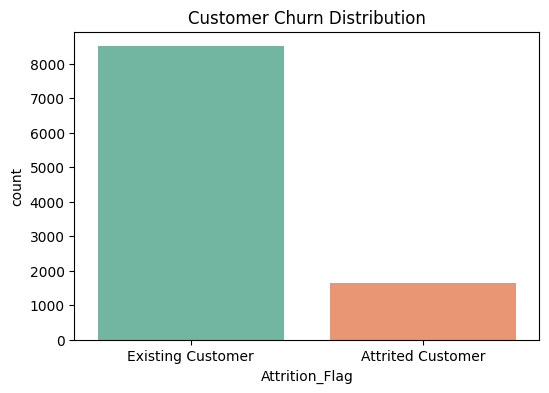

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Attrition_Flag', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()

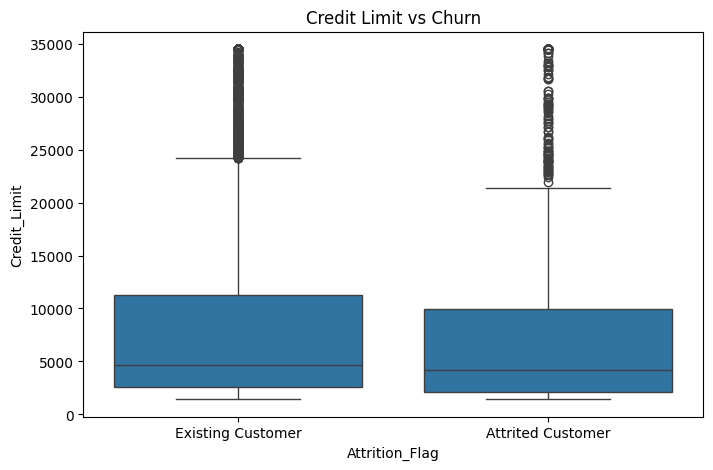

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=data)
plt.title("Credit Limit vs Churn")
plt.show()

<Axes: xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

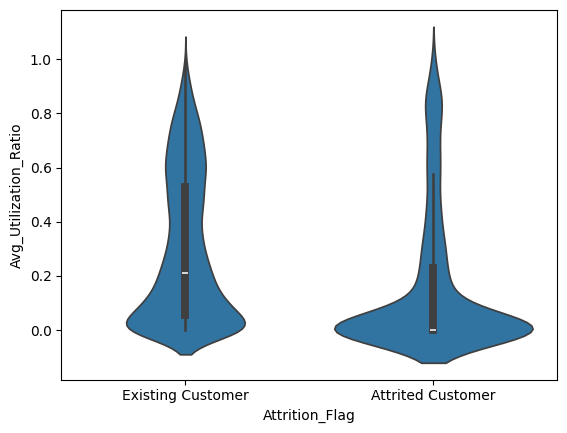

In [16]:
sns.violinplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=data)

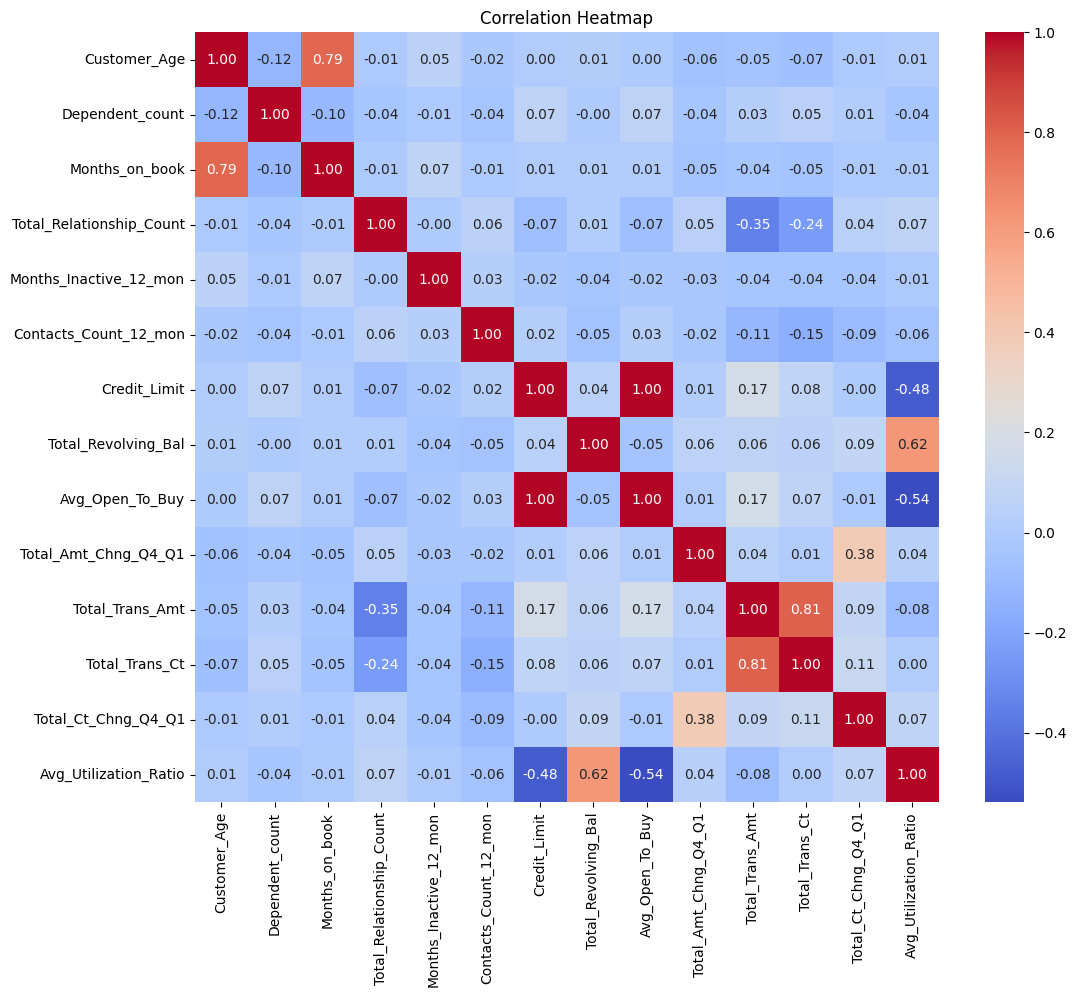

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

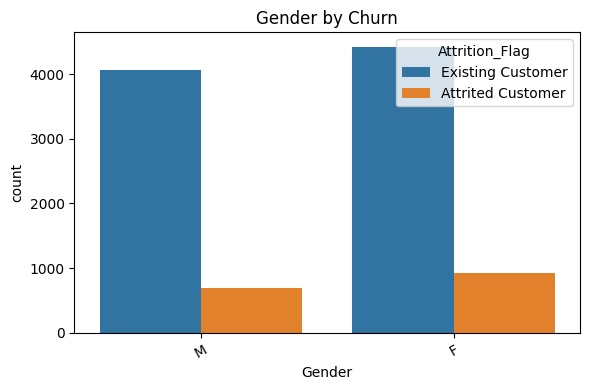

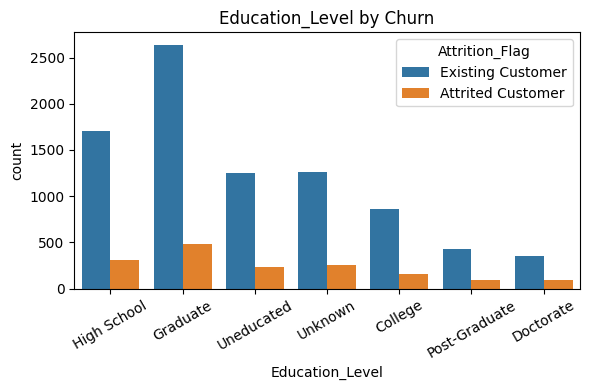

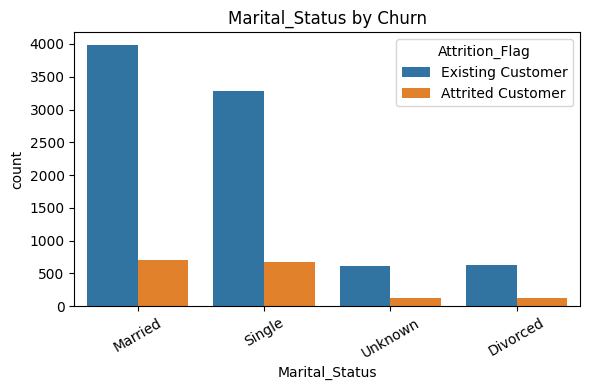

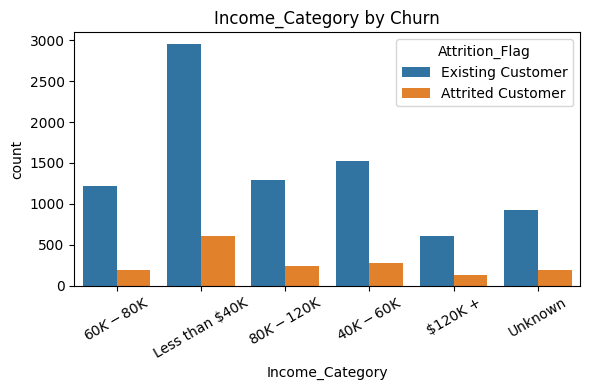

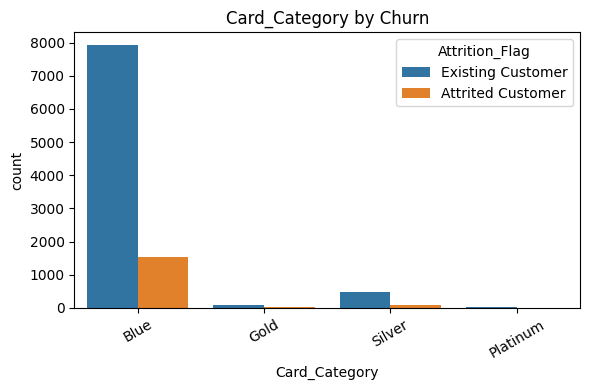

In [18]:
categorical = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='Attrition_Flag')
    plt.title(f"{col} by Churn")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

* Q. Is churn higher in specific income groups?
** A. higher in low income or unknown groups

* Q. Do inactive customers churn more?
** A. Yes — churners are inactive for more months

* Q. Is churn related to fewer transactions?
** A. Strong correlation — churners transact less

* Q. Are credit limits/utilization different?
** A. Varies — some churners have higher utilization, others stopped using

**2. Check if there is an imbalance in data. If there is an imbalance in data, resolve it.**

In [19]:
data['Churn'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
data.drop('Attrition_Flag', axis=1, inplace=True)

In [20]:
x = data.drop('Churn', axis=1)
y = data['Churn']
x_encoded = pd.get_dummies(x, drop_first=True)

In [21]:
from imblearn.under_sampling import RandomUnderSampler

# Split first (so test set remains untouched)
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, stratify=y, test_size=0.2, random_state=42)

# Apply undersampling on training set
rus = RandomUnderSampler(random_state=42)
x_train_bal, y_train_bal = rus.fit_resample(x_train, y_train)

In [22]:
print(y_train_bal.value_counts())

Churn
0    1302
1    1302
Name: count, dtype: int64


**3. Build a Logistic Regression classification model which will predict whether a customer is at risk to churn from the platform**

In [23]:
# Already prepared
x_train_bal, y_train_bal
x_test, y_test

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_bal)
x_test_scaled = scaler.transform(x_test)

In [24]:
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train_scaled, y_train_bal)

LogisticRegression(random_state=42)

In [25]:
y_pred = log_model.predict(x_test_scaled)

In [26]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1451  250]
 [  54  271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.91      1701
           1       0.52      0.83      0.64       325

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026

Accuracy: 0.8499506416584403


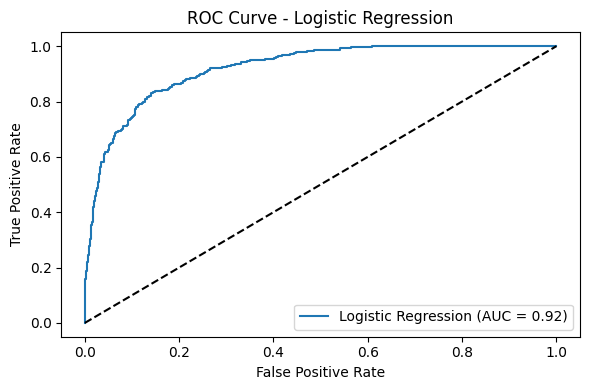

In [27]:
y_probs = log_model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

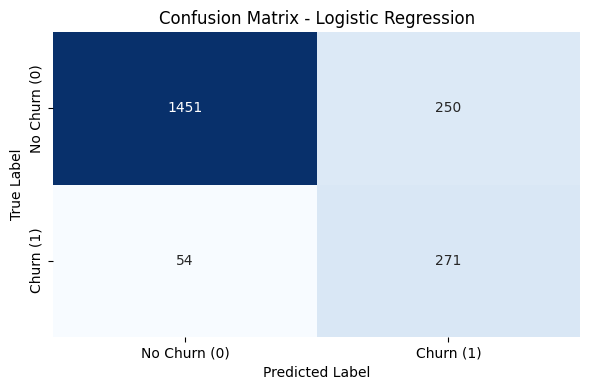

In [28]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

**4. Build Naive Bayes model which will predict whether a customer is at risk to churn from the platform.**

In [29]:
nb_model = GaussianNB()
nb_model.fit(x_train_bal, y_train_bal)

GaussianNB()

In [30]:
y_pred_nb = nb_model.predict(x_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [31]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[1567  134]
 [ 218  107]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1701
           1       0.44      0.33      0.38       325

    accuracy                           0.83      2026
   macro avg       0.66      0.63      0.64      2026
weighted avg       0.81      0.83      0.82      2026

Accuracy: 0.8262586377097729


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


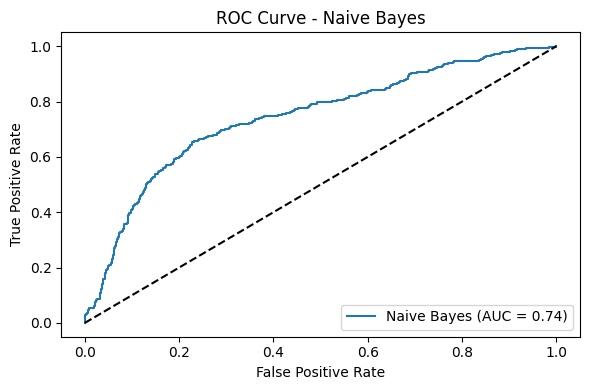

In [32]:
y_probs_nb = nb_model.predict_proba(x_test_scaled)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

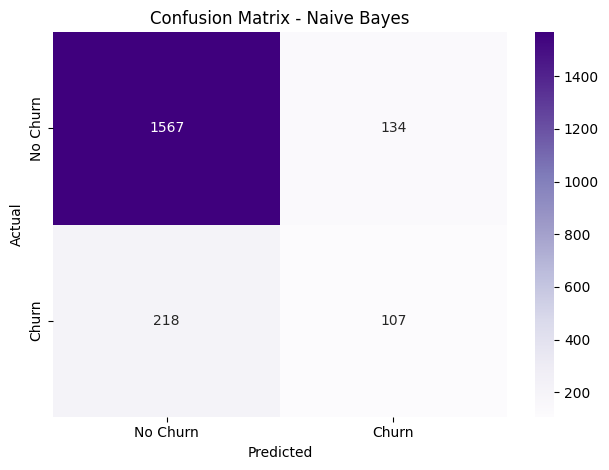

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**5. Build a K-nearest classifier which will predict whether a customer is at risk to churn from the platform.**

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=4)  # Can change the n_neighbors
knn_model.fit(x_train_scaled, y_train_bal)

y_pred_knn = knn_model.predict(x_test_scaled)

In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
 [[1445  256]
 [ 112  213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      1701
           1       0.45      0.66      0.54       325

    accuracy                           0.82      2026
   macro avg       0.69      0.75      0.71      2026
weighted avg       0.85      0.82      0.83      2026

Accuracy: 0.8183613030602171


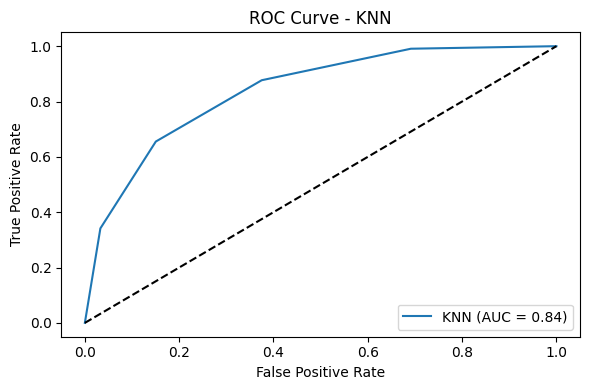

In [36]:
y_probs_knn = knn_model.predict_proba(x_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

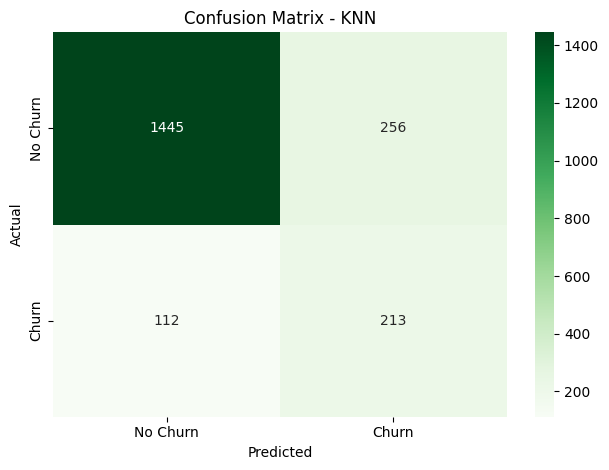

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**6. Find optimal parameters for the algorithm through GridSearchCV and build SVC model which will predict whether a customer is at risk to churn from the platform.**

In [38]:
svc = SVC(probability=True)  # Enable probability estimates for ROC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(estimator=svc,
                        param_grid=param_grid,
                        scoring='f1',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

In [39]:
grid_svc.fit(x_train_scaled, y_train_bal)

print("Best Parameters:", grid_svc.best_params_)

best_svc_model = grid_svc.best_estimator_

y_pred_svc = best_svc_model.predict(x_test_scaled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [40]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Confusion Matrix:
 [[1487  214]
 [  44  281]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      1701
           1       0.57      0.86      0.69       325

    accuracy                           0.87      2026
   macro avg       0.77      0.87      0.80      2026
weighted avg       0.91      0.87      0.88      2026

Accuracy: 0.8726554787759131


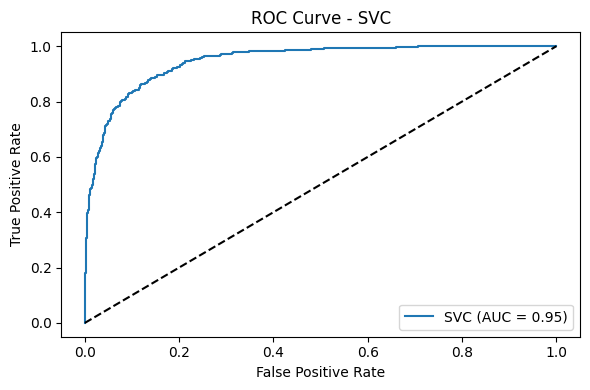

In [41]:
y_probs_svc = best_svc_model.predict_proba(x_test_scaled)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_probs_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure(figsize=(6, 4))
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

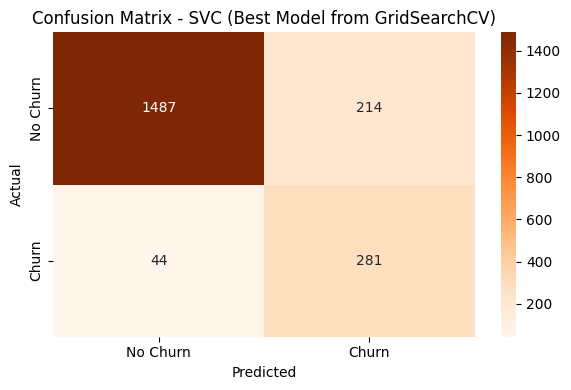

In [42]:
# Compute confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - SVC (Best Model from GridSearchCV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**7. Find optimal parameters for the algorithm through GridSearchCV and build a Decision tree which will predict whether a customer is at risk to churn from the platform.**

In [44]:
tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(estimator=tree,
                         param_grid=param_grid,
                         scoring='f1',
                         cv=5,
                         verbose=1,
                         n_jobs=-1)

In [45]:
grid_tree.fit(x_train_scaled, y_train_bal)

print("Best Parameters:", grid_tree.best_params_)

best_tree_model = grid_tree.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
y_pred_tree = best_tree_model.predict(x_test_scaled)

In [47]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

Confusion Matrix:
 [[1546  155]
 [  32  293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      1701
           1       0.65      0.90      0.76       325

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.85      2026
weighted avg       0.93      0.91      0.91      2026

Accuracy: 0.9076999012833169


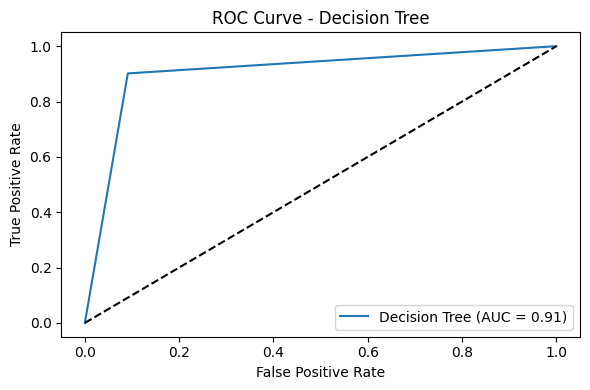

In [48]:
y_probs_tree = best_tree_model.predict_proba(x_test_scaled)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(6, 4))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

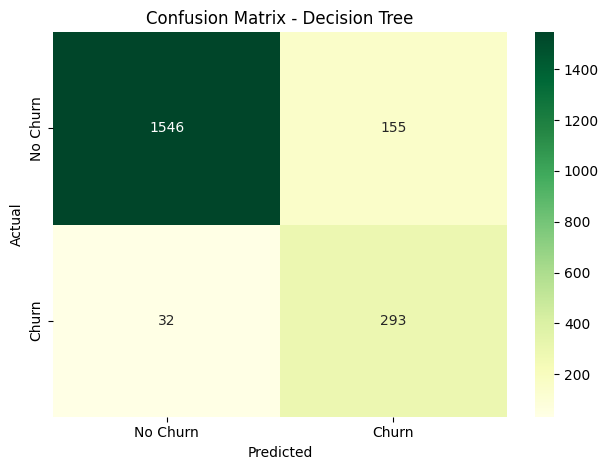

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='YlGn',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [51]:
# from sklearn.tree import plot_tree

# plt.figure(figsize=(20, 10))
# plot_tree(
#     best_tree_model,
#     feature_names=x_train_bal.columns,  # if using pandas DataFrame
#     class_names=["No Churn", "Churn"],
#     filled=True,
#     rounded=True,
#     max_depth=3  # limit depth to avoid clutter (optional)
# )
# plt.title("Decision Tree Structure (Top Levels Only)")
# plt.show()

**8. Find optimal parameters for the algorithm through RandomSearchCV and build a Random which will predict whether a customer is at risk to churn from the platform.**

In [53]:
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   scoring='f1',
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

In [54]:
random_search.fit(x_train_scaled, y_train_bal)

print("Best Parameters from RandomizedSearchCV:\n", random_search.best_params_)

best_rf_model = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from RandomizedSearchCV:
 {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [55]:
y_pred_rf = best_rf_model.predict(x_test_scaled)

In [56]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[1575  126]
 [  24  301]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      1701
           1       0.70      0.93      0.80       325

    accuracy                           0.93      2026
   macro avg       0.84      0.93      0.88      2026
weighted avg       0.94      0.93      0.93      2026

Accuracy: 0.9259624876604146


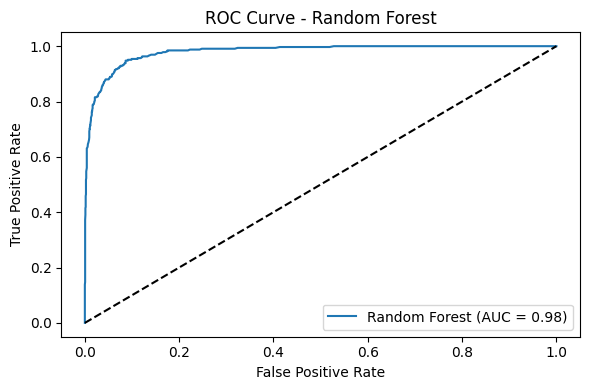

In [57]:
y_probs_rf = best_rf_model.predict_proba(x_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

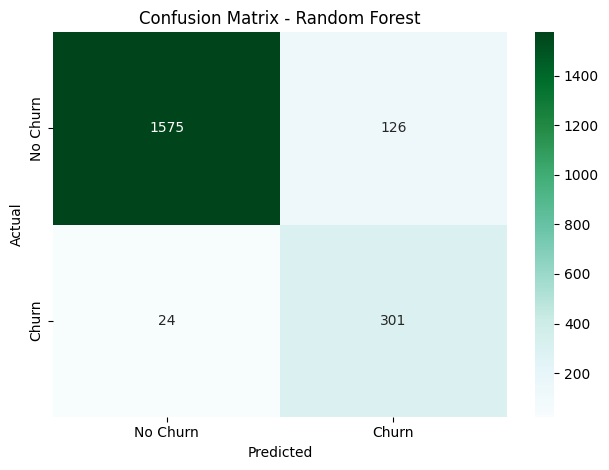

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='BuGn',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**9. Model Selection: Evaluate and compare performance of all the models to find the best model.**

In [61]:
def get_metrics(y_true, y_pred, y_probs):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_probs)
    }

# Collect metrics for each model
results = {
    'Logistic Regression': get_metrics(y_test, y_pred, y_probs),
    'Naive Bayes': get_metrics(y_test, y_pred_nb, y_probs_nb),
    'KNN': get_metrics(y_test, y_pred_knn, y_probs_knn),
    'SVC': get_metrics(y_test, y_pred_svc, y_probs_svc),
    'Decision Tree': get_metrics(y_test, y_pred_tree, y_probs_tree),
    'Random Forest': get_metrics(y_test, y_pred_rf, y_probs_rf)
}

# Convert to DataFrame for easier display

model_comparison = pd.DataFrame(results).T.sort_values(by='F1 Score', ascending=False)
model_comparison

,Accuracy,Precision,Recall,F1 Score,AUC
Random Forest,0.925962,0.704918,0.926154,0.800532,0.979667
Decision Tree,0.907700,0.654018,0.901538,0.758085,0.905208
SVC,0.872655,0.567677,0.864615,0.685366,0.946605
Logistic Regression,0.849951,0.520154,0.833846,0.640662,0.920175
KNN,0.818361,0.454158,0.655385,0.536524,0.838867
Naive Bayes,0.826259,0.443983,0.329231,0.378092,0.743393


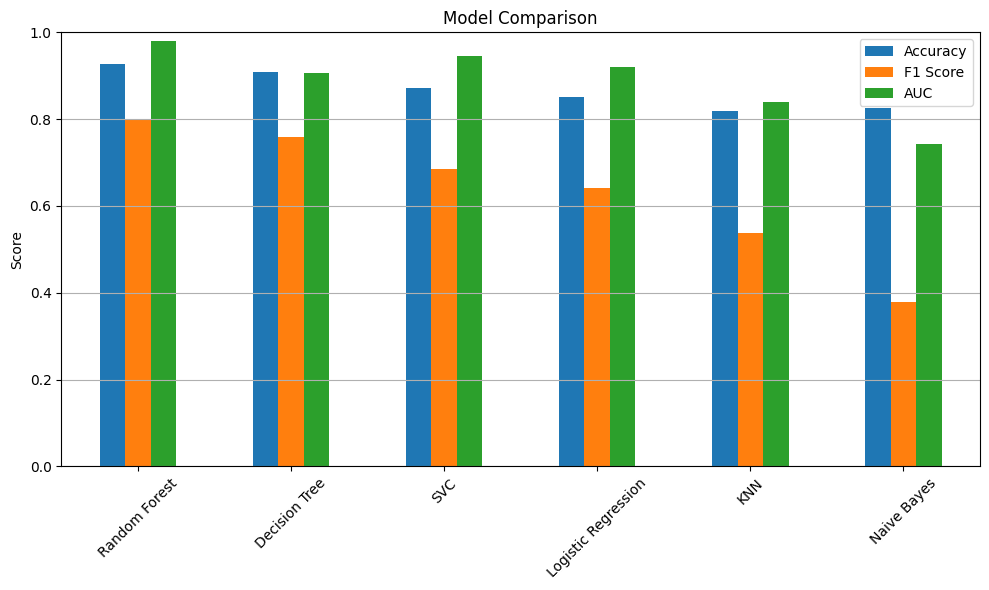

In [62]:
model_comparison[['Accuracy', 'F1 Score', 'AUC']].plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()